In [1]:
# Load the data

import pandas as pd
df = pd.read_csv("device-failure/device_failure.csv")
df

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0
5,15001,S1F01TD5,68837488,0,0,41,6,413535,0,0,1,0
6,15001,S1F01XDJ,227721632,0,0,0,8,402525,0,0,0,0
7,15001,S1F023H2,141503600,0,0,1,19,494462,16,16,3,0
8,15001,S1F02A0J,8217840,0,1,0,14,311869,0,0,0,0
9,15001,S1F02DZ2,116440096,0,323,9,9,407905,0,0,164,0


In [3]:
# Check for duplicate rows

df[df.duplicated(keep=False)]

# Result: OK - no duplicate rows

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure


In [5]:
# Check for duplicate device data inside one date

counted = df.groupby(["date","device"])["failure"].count()
counted[counted > 1]

# Result: OK - none found

Series([], Name: failure, dtype: int64)

In [3]:
# Check for dates wihout data

date_set = set(range(df["date"].min(), df["date"].max()))
empty_dates = date_set - set(df["date"].unique())
empty_dates

# Result - WARNING: there are 2 dates without data

{15301, 15305}

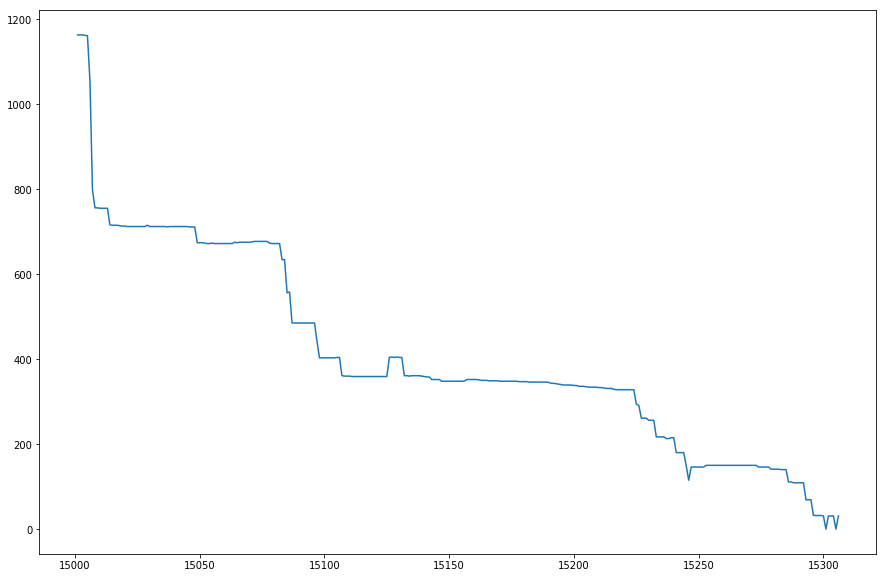

In [10]:
# Visualize amount od data collected by dates

# count groupping by date
count_by_date = df.groupby("date")["device"].count()

# add empty dates to se the impact
count_by_date = count_by_date.append(pd.Series(0,empty_dates)).sort_index()

count_by_date.plot( figsize=(15,10))

#Result - data seem to be colected in kinda accumulative way, so the "empty dates" in low-data zone make little impact